## PRUEBA TÉCNICA ANALISTA DE DATOS - ADRES

In [55]:
# Enseguida el desarrollo detallado de la prueba técnica para el rol de Analista de Datos - ADRES

# Importamos las bibliotecas necesarias
import pandas as pd  # Importamos la biblioteca pandas para trabajar con datos en formato de DataFrame
import zipfile      # Importamos la biblioteca zipfile para trabajar con archivos zip


def decompress_zip(zip_file_path, extract_to_path):
    """
    Esta función descomprime un archivo zip.

    Args:
        zip_file_path (str): Ruta del archivo zip que se desea descomprimir.
        extract_to_path (str): Ruta donde se desea extraer el contenido del archivo zip.

    Returns:
        None
    """
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)

# Descomprimir Archivos:

# Ruta donde se desea extraer el contenido de los archivos zip
extract_to_path = ''

# Ruta del archivo zip que contiene los datos de municipios
zip_file_path = 'Municipios.zip'
decompress_zip(zip_file_path, extract_to_path)

# Ruta del archivo zip que contiene los datos de prestadores
zip_file_path = 'Prestadores.zip'
decompress_zip(zip_file_path, extract_to_path)


In [56]:
# Leemos la primera base de municipios para iniciar con la exploración
# El código del departamento lo leeremos como string puesto que en ciertos casos incluye un 0 a la izquierda.
municipios = pd.read_excel('Municipios.xlsx',dtype={'Depmun': str})
municipios.head(5)

,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region
0,Ant%ioqUia,5,Mede&l'lín,05001,374.830625,2483545,5,Región Eje Cafetero
1,Ant%ioquia,5,Abej!&orr*al,05002,507.134114,20258,45,Región Eje Cafetero
2,Ant%ioquia,5,A?br'&iaquí,05004,296.955980,2710,58,Región Eje Cafetero
3,Ant%io>qUia,5,Alej#andr&'ía,05021,128.932153,4669,48,Región Eje Cafetero
4,Antioquia,5,Am#a?&'*gá,05030,84.132477,30777,28,Región Eje Cafetero


In [57]:
# El contenido de los campos Departamento y Municipio se encuentra modificado puesto que contienen una serie de caracteres especiales 
# que alteral los valores reales, ejemplo 'Ant%io>qUia' corresponde a 'Antioquia' y 'Alej#andr&'ía' corresponde a 'Alejandría'.
# Para corregir este inconveniente aplicamos expresiones regulares que ajusten el contenido de los campos.

import re

# Quitamos todos los caracteres no alfanumericos mediante expresiones regulares, eliminamos los espaciones iniciales y finales
# y luego aplicamos mayuscula inicial en la primera letra.
municipios['Departamento'] = municipios.apply(lambda x: re.sub(r'[^\sa-zA-Z0-9áéíóúÁÉÍÓÚü]', '', x['Departamento']).strip().capitalize(), axis=1)
municipios['Departamento'] = municipios.apply(lambda x: re.sub(r'\s+', ' ', x['Departamento']), axis=1)

municipios['Municipio'] = municipios.apply(lambda x: re.sub(r'[^\sa-zA-Z0-9áéíóúÁÉÍÓÚü]', '', x['Municipio']).strip().capitalize(), axis=1)
municipios['Municipio'] = municipios.apply(lambda x: re.sub(r'\s+', ' ', x['Municipio']), axis=1)

#municipios.to_excel('Municipios_Fixed.xlsx')
municipios.head(20)

,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region
0,Antioquia,5,Medellín,05001,374.830625,2483545,5,Región Eje Cafetero
1,Antioquia,5,Abejorral,05002,507.134114,20258,45,Región Eje Cafetero
2,Antioquia,5,Abriaquí,05004,296.955980,2710,58,Región Eje Cafetero
3,Antioquia,5,Alejandría,05021,128.932153,4669,48,Región Eje Cafetero
4,Antioquia,5,Amagá,05030,84.132477,30777,28,Región Eje Cafetero
5,Antioquia,5,Amalfi,05031,1209.126871,26552,54,Región Eje Cafetero
6,Antioquia,5,Andes,05034,402.502562,43713,38,Región Eje Cafetero
7,Antioquia,5,Angelópolis,05036,81.876302,5790,37,Región Eje Cafetero
8,Antioquia,5,Angostura,05038,338.666482,11462,47,Región Eje Cafetero
9,Antioquia,5,Anorí,05040,1413.773904,18737,58,Región Eje Cafetero


In [58]:
# Hacemos una validación de tipos para segurar que cada campo este almacenado en el tipo de dato lógico
municipios.dtypes

Departamento     object
Dep               int64
Municipio        object
Depmun           object
Superficie      float64
Poblacion         int64
Irural            int64
Region           object
dtype: object

In [59]:
# Dado que la información corresponde al detalle de los municipios en Colombia eliminaremos potenciales duplicados
municipios.drop_duplicates(inplace=True)

In [60]:
# Leemos la segunda base de prestadores para iniciar con la exploración

#prestadores = pd.read_excel('Prestadores.xls', engine='xlrd')
#prestadores.head(5)

# Al intentar leer el archivo con el metodo read_excel obtenemos un error, sugiriendo que es un archivo html o xml
# Por lo cual usaremos otro método para leer el archivo y ajustar el DataFrame

from bs4 import BeautifulSoup

# Dado que el contenido es en español leemos el HTML con encoding 'latin1'
with open('Prestadores.xls', 'r', encoding='latin1') as file:
    html_content = file.read()

soup = BeautifulSoup(html_content, 'html.parser')
table = soup.find('table')

# Extract table data into a list of lists
table_data = []
for row in table.find_all('tr'):
    row_data = []
    for cell in row.find_all(['th', 'td']):
        row_data.append(cell.text.strip())
    table_data.append(row_data)

# Convert the list of lists into a DataFrame
prestadores = pd.DataFrame(table_data[1:], columns=table_data[0])
prestadores.head()

,depa_nombre,muni_nombre,codigo_habilitacion,nombre_prestador,tido_codigo,nits_nit,razon_social,clpr_codigo,clpr_nombre,ese,...,fecha_cierre,dv,clase_persona,naju_codigo,naju_nombre,numero_sede_principal,fecha_corte_REPS,telefono_adicional,email_adicional,rep_legal
0,Amazonas,LETICIA,9100100148,ALEXANDER ABEL PEREZ FABRA,,72291077,ALEXANDER ABEL PEREZ FABRA,2,Profesional Independiente,,...,,0,NATURAL,1,Privada,01,Fecha corte REPS: Feb 16 2024 5:27PM,,,
1,Amazonas,LETICIA,9100100147,ALICIA PAOLA RUBIO CRUZ,,1018433478,ALICIA PAOLA RUBIO CRUZ,2,Profesional Independiente,,...,,0,NATURAL,1,Privada,01,Fecha corte REPS: Feb 16 2024 5:27PM,,,
2,Amazonas,LETICIA,9100100134,ALVARO ENRIQUE LEON LARA,,13803322,ALVARO ENRIQUE LEON LARA,2,Profesional Independiente,,...,,0,NATURAL,1,Privada,01,Fecha corte REPS: Feb 16 2024 5:27PM,,,
3,Amazonas,LETICIA,9100100038,ANA LUCIA DIAZ GUEVARA,,51782620,ANA LUCIA DIAZ GUEVARA,2,Profesional Independiente,NO,...,,7,NATURAL,1,Privada,01,Fecha corte REPS: Feb 16 2024 5:27PM,,,ANA LUCIA DIAZ GUEVARA
4,Amazonas,LETICIA,9100100107,ANDRES FELIPE ZAPATA HERNANDEZ,,15877110,andres felipe zapata hernandez,2,Profesional Independiente,,...,,0,NATURAL,1,Privada,01,Fecha corte REPS: Feb 16 2024 5:27PM,,,


In [61]:
# Ahora crearemos el campo Depmun que servira como llave con la base de Municipios. Haremos uso del campo 'codigo_habilitacion' el cual contiene en los 
# primeros 5 caracteres el Depmun. 
prestadores['Depmun'] = prestadores.apply( lambda x: x['codigo_habilitacion'][:5],axis=1)
prestadores.head()

,depa_nombre,muni_nombre,codigo_habilitacion,nombre_prestador,tido_codigo,nits_nit,razon_social,clpr_codigo,clpr_nombre,ese,...,dv,clase_persona,naju_codigo,naju_nombre,numero_sede_principal,fecha_corte_REPS,telefono_adicional,email_adicional,rep_legal,Depmun
0,Amazonas,LETICIA,9100100148,ALEXANDER ABEL PEREZ FABRA,,72291077,ALEXANDER ABEL PEREZ FABRA,2,Profesional Independiente,,...,0,NATURAL,1,Privada,01,Fecha corte REPS: Feb 16 2024 5:27PM,,,,91001
1,Amazonas,LETICIA,9100100147,ALICIA PAOLA RUBIO CRUZ,,1018433478,ALICIA PAOLA RUBIO CRUZ,2,Profesional Independiente,,...,0,NATURAL,1,Privada,01,Fecha corte REPS: Feb 16 2024 5:27PM,,,,91001
2,Amazonas,LETICIA,9100100134,ALVARO ENRIQUE LEON LARA,,13803322,ALVARO ENRIQUE LEON LARA,2,Profesional Independiente,,...,0,NATURAL,1,Privada,01,Fecha corte REPS: Feb 16 2024 5:27PM,,,,91001
3,Amazonas,LETICIA,9100100038,ANA LUCIA DIAZ GUEVARA,,51782620,ANA LUCIA DIAZ GUEVARA,2,Profesional Independiente,NO,...,7,NATURAL,1,Privada,01,Fecha corte REPS: Feb 16 2024 5:27PM,,,ANA LUCIA DIAZ GUEVARA,91001
4,Amazonas,LETICIA,9100100107,ANDRES FELIPE ZAPATA HERNANDEZ,,15877110,andres felipe zapata hernandez,2,Profesional Independiente,,...,0,NATURAL,1,Privada,01,Fecha corte REPS: Feb 16 2024 5:27PM,,,,91001


In [62]:
# Dado que la información corresponde al detalle de los prestadores en Colombia eliminaremos potenciales duplicados
prestadores.drop_duplicates(inplace=True)

In [63]:
# Ahora que la información se encuentra limpia haremos el cargue de ambas bases en SQLLite
import sqlite3

sqlite_file = 'ADRES.db'
conn = sqlite3.connect(sqlite_file)

# Almacenamos los DataFrame en dos tablas
municipios.to_sql('municipios', conn, if_exists='replace', index=False)
prestadores.to_sql('prestadores', conn, if_exists='replace', index=False)

conn.close()

In [64]:
conn = sqlite3.connect(sqlite_file)
cursor = conn.cursor()

# Query SQL a ejecutar, hacemos el LEFT JOIN para adicionar información a la base de prestadores
query = """
    SELECT *
    FROM prestadores
    LEFT JOIN municipios ON municipios.Depmun = prestadores.Depmun
"""

cursor.execute(query)

results = cursor.fetchall()
conn.close()

# Convertimos los resultados del query en dataframe para iniciar todos los análisis

# Obtener los nombres de las columnas
columns = [description[0] for description in cursor.description]

# Convertir los resultados en un DataFrame de pandas
main_df = pd.DataFrame(results, columns=columns)

main_df.head()

,depa_nombre,muni_nombre,codigo_habilitacion,nombre_prestador,tido_codigo,nits_nit,razon_social,clpr_codigo,clpr_nombre,ese,...,rep_legal,Depmun,Departamento,Dep,Municipio,Depmun,Superficie,Poblacion,Irural,Region
0,Amazonas,LETICIA,9100100148,ALEXANDER ABEL PEREZ FABRA,,72291077,ALEXANDER ABEL PEREZ FABRA,2,Profesional Independiente,,...,,91001,Amazonas,91.0,Leticia,91001,6182.41656,48918.0,70.0,Región Centro Sur
1,Amazonas,LETICIA,9100100147,ALICIA PAOLA RUBIO CRUZ,,1018433478,ALICIA PAOLA RUBIO CRUZ,2,Profesional Independiente,,...,,91001,Amazonas,91.0,Leticia,91001,6182.41656,48918.0,70.0,Región Centro Sur
2,Amazonas,LETICIA,9100100134,ALVARO ENRIQUE LEON LARA,,13803322,ALVARO ENRIQUE LEON LARA,2,Profesional Independiente,,...,,91001,Amazonas,91.0,Leticia,91001,6182.41656,48918.0,70.0,Región Centro Sur
3,Amazonas,LETICIA,9100100038,ANA LUCIA DIAZ GUEVARA,,51782620,ANA LUCIA DIAZ GUEVARA,2,Profesional Independiente,NO,...,ANA LUCIA DIAZ GUEVARA,91001,Amazonas,91.0,Leticia,91001,6182.41656,48918.0,70.0,Región Centro Sur
4,Amazonas,LETICIA,9100100107,ANDRES FELIPE ZAPATA HERNANDEZ,,15877110,andres felipe zapata hernandez,2,Profesional Independiente,,...,,91001,Amazonas,91.0,Leticia,91001,6182.41656,48918.0,70.0,Región Centro Sur


In [65]:
# Hacemos la validación de la cantidad de registros presentes entre la base de prestadores iniciales y la base que obtenemos del query
# para asegurar que no tenemos duplicados.
len(main_df)==len(prestadores)

True

In [66]:
# Ahora teniendo las bases empezaremos a resolver las principales preguntas.
# El primer KPI a analizar es Densidad de Prestadores entendido como la cantidad de personas que en promedio
# deben ser atendidas por cada prestador. Iniciaremos en este analisis a nivel regional.

conn = sqlite3.connect(sqlite_file)
cursor = conn.cursor()

query = """
    select A.Region,Poblacion_Total,Cantidad_Prestadores,Poblacion_Total/Cantidad_Prestadores Densidad_Prestadores
    FROM
    ( SELECT Region,COUNT(nombre_prestador) as Cantidad_Prestadores
    FROM prestadores
    LEFT JOIN municipios ON municipios.Depmun = prestadores.Depmun
    GROUP BY Region
    ) A
    LEFT JOIN 
    ( SELECT Region,SUM(Poblacion) AS Poblacion_Total
    FROM municipios
    GROUP BY Region ) B
    ON A.Region = B.Region
    ORDER BY Densidad_Prestadores DESC
"""

cursor.execute(query)
regions = cursor.fetchall()
conn.close()

columns = [description[0] for description in cursor.description]
regions = pd.DataFrame(regions, columns=columns)
regions

,Region,Poblacion_Total,Cantidad_Prestadores,Densidad_Prestadores
0,Región Caribe,11060389.0,8461,1307.0
1,Región Llano,2048306.0,1748,1171.0
2,Región Centro Sur,3284811.0,3096,1060.0
3,Región Pacífico,8134239.0,8824,921.0
4,Región Centro Oriente,15712252.0,23479,669.0
5,Región Eje Cafetero,9058916.0,15331,590.0
6,None,NaN,7,NaN


In [67]:
# En promedio la región Caribe y el Llano son las regiones cuyos prestadores deben cubir una mayor población.
# Indagaremos un poco más al respecto llegando a nivel departamental:

conn = sqlite3.connect(sqlite_file)
cursor = conn.cursor()

query = """
    select A.Region,A.Departamento,Poblacion_Total,Cantidad_Prestadores,Poblacion_Total/Cantidad_Prestadores Densidad_Prestadores
    FROM
    ( SELECT Region,Departamento,COUNT(nombre_prestador) as Cantidad_Prestadores
    FROM prestadores
    LEFT JOIN municipios ON municipios.Depmun = prestadores.Depmun
    GROUP BY Region,Departamento
    ) A
    LEFT JOIN 
    ( SELECT Region,Departamento,SUM(Poblacion) AS Poblacion_Total
    FROM municipios
    GROUP BY Region,Departamento ) B
    ON A.Departamento = B.Departamento
    ORDER BY Densidad_Prestadores DESC
"""

cursor.execute(query)
departamento = cursor.fetchall()
conn.close()

columns = [description[0] for description in cursor.description]
departamento = pd.DataFrame(departamento, columns=columns)
departamento

,Region,Departamento,Poblacion_Total,Cantidad_Prestadores,Densidad_Prestadores
0,Región Llano,Vaupés,42721.0,11,3883.0
1,Región Llano,Vichada,110599.0,29,3813.0
2,Región Llano,Guainía,49473.0,15,3298.0
3,Región Caribe,La guajira,927506.0,404,2295.0
4,Región Pacífico,Chocó,539933.0,266,2029.0
5,Región Caribe,Córdoba,1741111.0,1017,1712.0
6,Región Centro Sur,Caquetá,406142.0,248,1637.0
7,Región Pacífico,Cauca,1458557.0,894,1631.0
8,Región Centro Sur,Putumayo,353759.0,236,1498.0
9,Región Caribe,Magdalena,1388832.0,939,1479.0


In [68]:
# En cooncordancia con el resultado preliminar, apreciamos como hay departamentos como Vaupés, Vichada, Guainía, La Guajira y el Chocó
# dónde en promedio cada prestador debe cubrir más de 2.000 personas evidenciando una importante oportunidad que existe en dichos departamentos
# para mejorar la prescencia de prestadores de salud.

# Indagaremos un poco más explorando el mix de tipo de prestadores por departamento.

conn = sqlite3.connect(sqlite_file)
cursor = conn.cursor()

query = """
    SELECT 
    Region,A.Departamento,Cantidad_Prestadores,
    Privada,Pública,Mixta,
    100*Privada/Cantidad_Prestadores as PER_Privada,
    100*Pública/Cantidad_Prestadores as PER_Pública,
    100*Mixta/Cantidad_Prestadores as PER_Mixta,
    Poblacion_Total/Cantidad_Prestadores Densidad_Prestadores
    FROM (
    SELECT Region,Departamento,COUNT(nombre_prestador) as Cantidad_Prestadores,
    SUM(CASE WHEN naju_nombre = 'Privada' THEN 1 ELSE 0 END) AS Privada,
    SUM(CASE WHEN naju_nombre = 'Pública' THEN 1 ELSE 0 END) AS Pública,
    SUM(CASE WHEN naju_nombre = 'Mixta' THEN 1 ELSE 0 END) AS Mixta
    FROM
        prestadores
        LEFT JOIN municipios ON municipios.Depmun = prestadores.Depmun
    GROUP BY Region,Departamento
    ) A
    LEFT JOIN 
    ( SELECT Departamento,SUM(Poblacion) AS Poblacion_Total
    FROM municipios
    GROUP BY Region,Departamento ) B
    ON A.Departamento = B.Departamento
    ORDER BY Densidad_Prestadores DESC
"""

cursor.execute(query)
mix_departamento = cursor.fetchall()
conn.close()

columns = [description[0] for description in cursor.description]
mix_departamento = pd.DataFrame(mix_departamento, columns=columns)
mix_departamento

,Region,Departamento,Cantidad_Prestadores,Privada,Pública,Mixta,PER_Privada,PER_Pública,PER_Mixta,Densidad_Prestadores
0,Región Llano,Vaupés,11,10,1,0,90,9,0,3883.0
1,Región Llano,Vichada,29,28,1,0,96,3,0,3813.0
2,Región Llano,Guainía,15,13,1,1,86,6,6,3298.0
3,Región Caribe,La guajira,404,359,44,1,88,10,0,2295.0
4,Región Pacífico,Chocó,266,257,7,2,96,2,0,2029.0
5,Región Caribe,Córdoba,1017,983,34,0,96,3,0,1712.0
6,Región Centro Sur,Caquetá,248,240,8,0,96,3,0,1637.0
7,Región Pacífico,Cauca,894,861,33,0,96,3,0,1631.0
8,Región Centro Sur,Putumayo,236,226,10,0,95,4,0,1498.0
9,Región Caribe,Magdalena,939,899,40,0,95,4,0,1479.0


In [69]:
# Basados en el resultado anterior, vemos como la atención esta principalmente focalizada en prestadores de indole privado.
# Es interesante evidenciar que en los departamentos que habiamos identificado en análisis previos la prescendia de prestadores
# públicos es porcentualmente más alta que en otros departamentos. Este efecto puede deberse a iniciativas por parte del gobierno
# para tener mayor prescencia en departamentos con baja cobeturta y así mismo a falta de incentivo por parte de privados para desplegar 
# mayor cobertura.

# Realizaremos un analisis similar con el mix de nombre de clrp por departamento.

conn = sqlite3.connect(sqlite_file)
cursor = conn.cursor()

query = """
    SELECT 
    Region,A.Departamento,Cantidad_Prestadores,
    Indep,IPS,Diff_PSS,Transp,
    100*Indep/Cantidad_Prestadores as PER_Indep,
    100*IPS/Cantidad_Prestadores as PER_IPS,
    100*Diff_PSS/Cantidad_Prestadores as PER_Diff_PSS,
    100*Transp/Cantidad_Prestadores as PER_Transp,
    Poblacion_Total/Cantidad_Prestadores Densidad_Prestadores
    FROM (
    SELECT Region,Departamento,COUNT(nombre_prestador) as Cantidad_Prestadores,
    SUM(CASE WHEN clpr_nombre = 'Profesional Independiente' THEN 1 ELSE 0 END) AS Indep,
    SUM(CASE WHEN clpr_nombre = 'Instituciones Prestadoras de Servicios de Salud - IPS' THEN 1 ELSE 0 END) AS IPS,
    SUM(CASE WHEN clpr_nombre = 'Objeto Social Diferente a la Prestación de Servicios de Salud' THEN 1 ELSE 0 END) AS Diff_PSS,
    SUM(CASE WHEN clpr_nombre = 'Transporte Especial de Pacientes' THEN 1 ELSE 0 END) AS Transp
    FROM
        prestadores
        LEFT JOIN municipios ON municipios.Depmun = prestadores.Depmun
    GROUP BY Region,Departamento
    ) A
    LEFT JOIN 
    ( SELECT Departamento,SUM(Poblacion) AS Poblacion_Total
    FROM municipios
    GROUP BY Region,Departamento ) B
    ON A.Departamento = B.Departamento
    ORDER BY Densidad_Prestadores DESC
"""

cursor.execute(query)
mix_departamento_pres = cursor.fetchall()
conn.close()

columns = [description[0] for description in cursor.description]
mix_departamento_pres = pd.DataFrame(mix_departamento_pres, columns=columns)
mix_departamento_pres

,Region,Departamento,Cantidad_Prestadores,Indep,IPS,Diff_PSS,Transp,PER_Indep,PER_IPS,PER_Diff_PSS,PER_Transp,Densidad_Prestadores
0,Región Llano,Vaupés,11,3,3,3,2,27,27,27,18,3883.0
1,Región Llano,Vichada,29,22,7,0,0,75,24,0,0,3813.0
2,Región Llano,Guainía,15,5,10,0,0,33,66,0,0,3298.0
3,Región Caribe,La guajira,404,167,215,13,9,41,53,3,2,2295.0
4,Región Pacífico,Chocó,266,84,147,34,1,31,55,12,0,2029.0
5,Región Caribe,Córdoba,1017,546,444,23,4,53,43,2,0,1712.0
6,Región Centro Sur,Caquetá,248,159,71,10,8,64,28,4,3,1637.0
7,Región Pacífico,Cauca,894,585,263,28,18,65,29,3,2,1631.0
8,Región Centro Sur,Putumayo,236,146,73,8,9,61,30,3,3,1498.0
9,Región Caribe,Magdalena,939,449,450,24,16,47,47,2,1,1479.0


In [70]:
# Al evaluar los resultados previos identificamos como en departamentos tal y como el Vaupés, La guajira y el Chocó el porcentaje
# de prestadores con Objeto Social Diferente a la Prestación de Servicios de Salud o de Transporte Especial de Pacientes tiene un peso
# importante sobre el total de prestadores del departamento. Puede ser un indicador de que incluso la cobertura real de prestadores de salud
# puede ser aún menor de lo calculado

# Con la información disponible podemos establer un indicador referente a la cantidad prestadores cuyo vencimiento se encuentra dentro de los proximos 2 meses
# Que puede ser utilizado para trabajar en las renovaciones a las que haya lugar.

conn = sqlite3.connect(sqlite_file)
cursor = conn.cursor()

query = """
    SELECT depa_nombre,COUNT(nombre_prestador) AS Cantidad_Prestadores
    FROM prestadores
    WHERE fecha_vencimiento < 20240400
    GROUP BY depa_nombre
    order by Cantidad_Prestadores DESC
"""

cursor.execute(query)
close_to_venc = cursor.fetchall()
conn.close()

columns = [description[0] for description in cursor.description]
close_to_venc = pd.DataFrame(close_to_venc, columns=columns)
close_to_venc

,depa_nombre,Cantidad_Prestadores
0,Antioquia,103
1,Bogotá D.C,75
2,Cali,17
3,Barranquilla,17
4,Nariño,15
5,Caldas,14
6,Valle del cauca,13
7,Boyacá,12
8,Tolima,11
9,Cundinamarca,11


In [71]:
# Con este resultado se aprecia que se debe hacer un enfoque en Antioquia para trabajar en las renovaciónes correspondientes,
# puesto que aunque no es el departamento con más prestadores de servicio, si cuenta con la mayor cantidad de prestadores a vencer dentro de 2 meses.

Text(139.52402486834325, 0.5, 'Latitude')

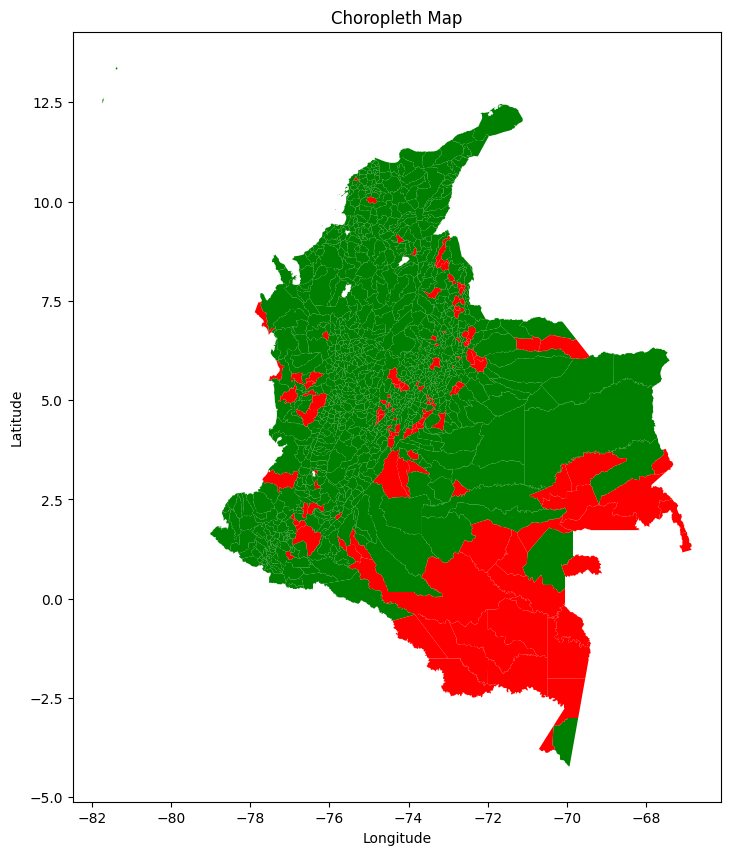

In [72]:
# Finalmente, combinaremos la información de la prueba con un mapa de los municipios de colombia para crear un mapa binario en el qué se
# evidenciaran los municipios en los cuales no se tiene prescencia de ningún prestador actualmente. Para dicho objetivo descargamos el shapefile desde
# el siguiente link:
# https://datosabiertos-esri-colombia.opendata.arcgis.com/datasets/623a71c7f5c94bada0416879df0effe4/explore?location=3.701809%2C-73.860478%2C6.85

#!pip3 install geopandas
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the shapefile
shapefile_path = 'Municipios/Servicios_P%C3%BAblicos_-_Municipios.shp'
gdf = gpd.read_file(shapefile_path)
gdf['Depmun'] = gdf['DPTO_CCDGO'] + gdf['MPIO_CCDGO']

tmp_df = main_df[['Depmun','nombre_prestador']]
tmp_df = tmp_df.iloc[:, -2:].groupby('Depmun').size()
tmp_df = tmp_df.reset_index()
tmp_df.rename(columns={0:'Cantidad_Prestadores'},inplace=True)

gdf  = gdf.merge(tmp_df,on='Depmun',how='left')
gdf['Cantidad_Prestadores'].fillna(0,inplace=True)
gdf['Prescencia'] = gdf.apply(lambda x: True if x['Cantidad_Prestadores']>0 else False,axis=1)

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(10, 10))

# Specify the column to use for coloring
column_to_color = 'Prescencia'

# Define the colormap
colors = ['red', 'green']  # Colors for values <= 0 and values > 0
cmap = ListedColormap(colors)

# Plot the choropleth map
gdf.plot(column=column_to_color, cmap=cmap, ax=ax)

# Add title and labels
plt.title('Choropleth Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [73]:
# Este mapa pone en manifiesto las zonas en las cuales no existe ningun prestador de salud donde sus habitantes
# deben desplazarse a un municipio aledaño para poder acceder a dicho servicio.

# EoF